# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [4]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


In [5]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3872 non-null   datetime64[ns]
 1   Open            3872 non-null   float64       
 2   High            3872 non-null   float64       
 3   Low             3872 non-null   float64       
 4   Close           3872 non-null   float64       
 5   Volume          3872 non-null   int64         
 6   Dividends       3872 non-null   float64       
 7   Stock Splits    3872 non-null   float64       
 8   Year            3872 non-null   int64         
 9   Converted Date  3872 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 302.6 KB


In [10]:
stocks_df['Year'].value_counts()

2008    253
2020    253
2009    252
2010    252
2011    252
2013    252
2014    252
2015    252
2016    252
2019    252
2007    251
2017    251
2018    251
2012    250
2021    195
2006    152
Name: Year, dtype: int64

## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

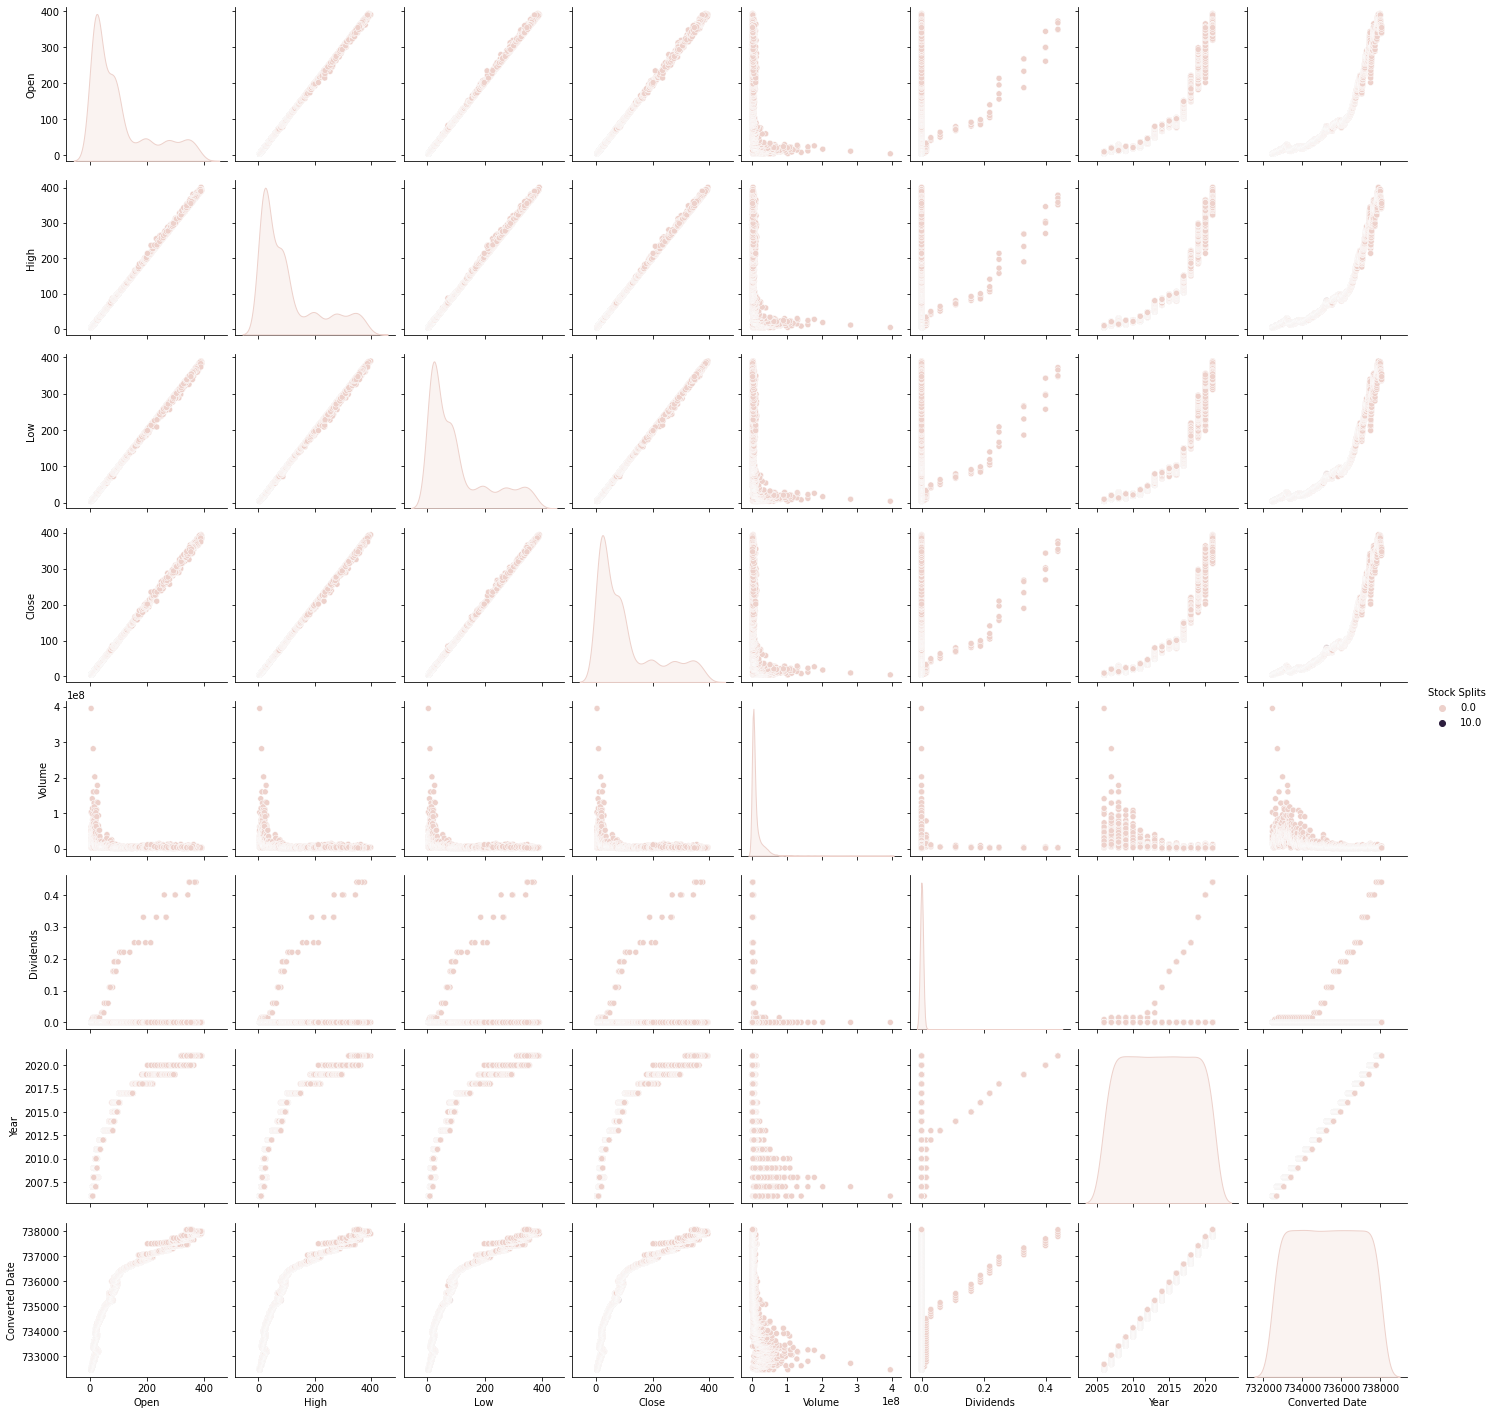

In [21]:
g = sb.pairplot(stocks_df, hue = 'Stock Splits')

C:\Users\praka\AppData\Local\Temp\ipykernel_13092\3269986417.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr1,dtype = np.bool)


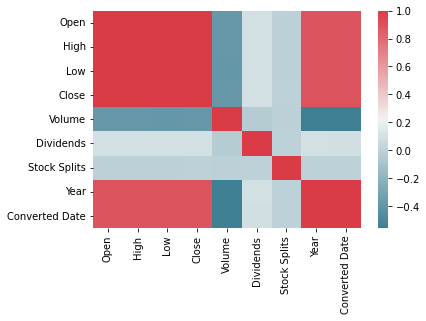

In [28]:
corr1= stocks_df.corr()
mask = np.zeros_like(corr1,dtype = np.bool)
cmap = sb.diverging_palette(220,10,as_cmap=True)
sb.heatmap(corr1,mask = mask,cmap=cmap)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [52]:
x = stocks_df['Open'].iloc[:100]
y = stocks_df['High'].iloc[:100]

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

<AxesSubplot:xlabel='Open', ylabel='High'>

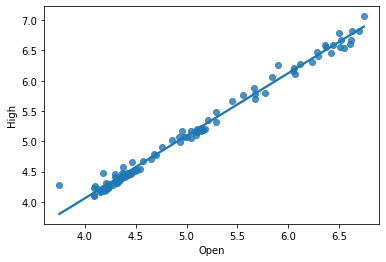

In [64]:
# sb.scatterplot(x = x,y= y)
sb.regplot(x=x,y=y,ci=None,data=stocks_df)


With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

Now plot the residuals. Did you get a bell curve?

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 